<a href="https://colab.research.google.com/github/Muhammadrizqiwarsita22/UAS_AI/blob/main/UASKLMPK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv

In [ ]:
dataset = pd.read_csv("Data_Tanaman_Padi_Sumatera_version_1_binary.csv")

In [ ]:
dataset.shape

(224, 14)

In [ ]:
dataset.head(10)

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,0.000000,0.265928,0.321700,0.265025,0.763736,0.505222,1,0,0,0,0,0,0,0
1,0.037037,0.259761,0.328435,0.245023,0.767033,0.617493,1,0,0,0,0,0,0,0
2,0.074074,0.276958,0.341048,0.236532,0.783516,0.532637,1,0,0,0,0,0,0,0
3,0.111111,0.284445,0.352128,0.251816,0.791209,0.507833,1,0,0,0,0,0,0,0
4,0.148148,0.273893,0.338958,0.210680,0.776374,0.537859,1,0,0,0,0,0,0,0
5,0.185185,0.281439,0.373952,0.234456,0.780220,0.607050,1,0,0,0,0,0,0,0
6,0.222222,0.296761,0.366449,0.293518,0.785440,0.515666,1,0,0,0,0,0,0,0
7,0.259259,0.298455,0.337975,0.330635,1.000000,0.640992,1,0,0,0,0,0,0,0
8,0.296296,0.310979,0.286649,0.276668,0.419780,0.875979,1,0,0,0,0,0,0,0
9,0.333333,0.262751,0.311253,0.202717,0.399725,0.915144,1,0,0,0,0,0,0,0


In [ ]:
dataset[["Provinsi_Aceh", "Provinsi_Bengkulu", "Provinsi_Jambi", "Provinsi_Lampung"]].describe()

,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung
count,224.00000,224.00000,224.00000,224.00000
mean,0.12500,0.12500,0.12500,0.12500
std,0.33146,0.33146,0.33146,0.33146
min,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000,0.00000
75%,0.00000,0.00000,0.00000,0.00000
max,1.00000,1.00000,1.00000,1.00000


In [ ]:
dataset["Provinsi_Bengkulu"].value_counts()

Provinsi_Bengkulu
0    196
1     28
Name: count, dtype: int64

In [ ]:
dataset.groupby('Kelembapan').size()

Kelembapan
0.000000    1
0.378571    1
0.398626    1
0.399725    1
0.419780    1
           ..
0.919780    1
0.921154    1
0.927747    1
0.977198    1
1.000000    1
Length: 180, dtype: int64

<Axes: >

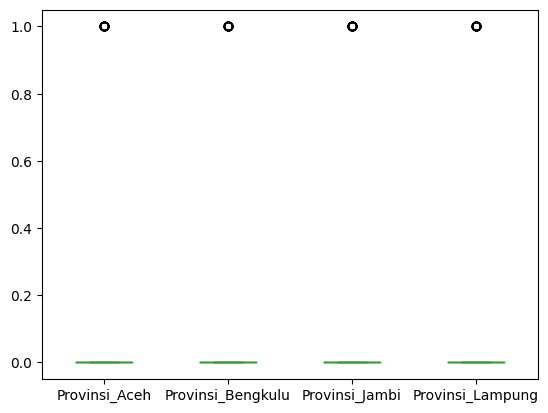

In [ ]:
dataset[["Provinsi_Aceh", "Provinsi_Bengkulu", "Provinsi_Jambi", "Provinsi_Lampung"]].plot(kind='box', layout=(3,4), sharex = False, sharey = False)

array([[<Axes: title={'center': 'Provinsi_Aceh'}>,
        <Axes: title={'center': 'Provinsi_Bengkulu'}>],
       [<Axes: title={'center': 'Provinsi_Jambi'}>,
        <Axes: title={'center': 'Provinsi_Lampung'}>]], dtype=object)

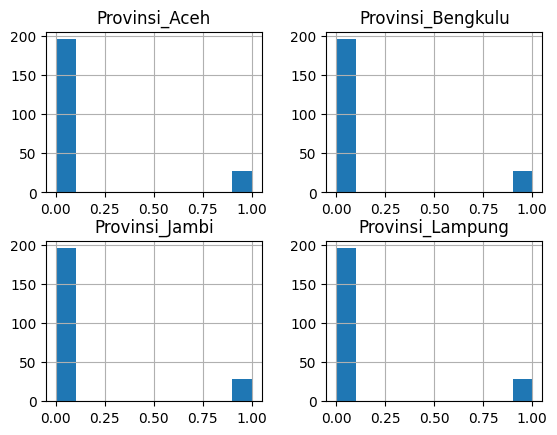

In [ ]:
dataset[["Provinsi_Aceh", "Provinsi_Bengkulu", "Provinsi_Jambi", "Provinsi_Lampung"]].hist()

array([[<Axes: xlabel='Provinsi_Aceh', ylabel='Provinsi_Aceh'>,
        <Axes: xlabel='Provinsi_Bengkulu', ylabel='Provinsi_Aceh'>,
        <Axes: xlabel='Provinsi_Jambi', ylabel='Provinsi_Aceh'>,
        <Axes: xlabel='Provinsi_Lampung', ylabel='Provinsi_Aceh'>],
       [<Axes: xlabel='Provinsi_Aceh', ylabel='Provinsi_Bengkulu'>,
        <Axes: xlabel='Provinsi_Bengkulu', ylabel='Provinsi_Bengkulu'>,
        <Axes: xlabel='Provinsi_Jambi', ylabel='Provinsi_Bengkulu'>,
        <Axes: xlabel='Provinsi_Lampung', ylabel='Provinsi_Bengkulu'>],
       [<Axes: xlabel='Provinsi_Aceh', ylabel='Provinsi_Jambi'>,
        <Axes: xlabel='Provinsi_Bengkulu', ylabel='Provinsi_Jambi'>,
        <Axes: xlabel='Provinsi_Jambi', ylabel='Provinsi_Jambi'>,
        <Axes: xlabel='Provinsi_Lampung', ylabel='Provinsi_Jambi'>],
       [<Axes: xlabel='Provinsi_Aceh', ylabel='Provinsi_Lampung'>,
        <Axes: xlabel='Provinsi_Bengkulu', ylabel='Provinsi_Lampung'>,
        <Axes: xlabel='Provinsi_Jambi', ylabel=

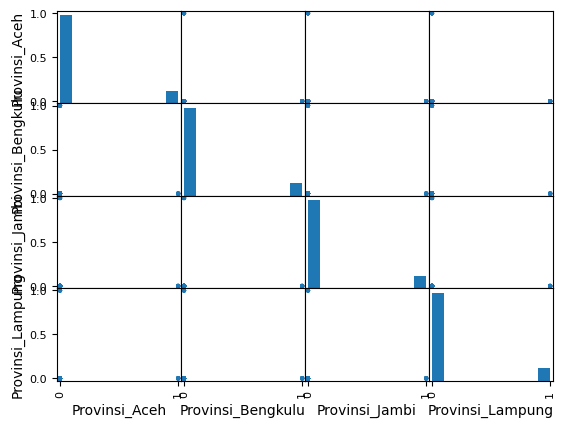

In [ ]:
scatter_matrix(dataset[["Provinsi_Aceh", "Provinsi_Bengkulu", "Provinsi_Jambi", "Provinsi_Lampung"]])

In [ ]:
dataset

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,0.000000,0.265928,0.321700,0.265025,0.763736,0.505222,1,0,0,0,0,0,0,0
1,0.037037,0.259761,0.328435,0.245023,0.767033,0.617493,1,0,0,0,0,0,0,0
2,0.074074,0.276958,0.341048,0.236532,0.783516,0.532637,1,0,0,0,0,0,0,0
3,0.111111,0.284445,0.352128,0.251816,0.791209,0.507833,1,0,0,0,0,0,0,0
4,0.148148,0.273893,0.338958,0.210680,0.776374,0.537859,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.851852,0.783147,0.404717,0.395339,0.692308,0.556136,0,0,0,1,0,0,0,0
220,0.888889,0.836625,0.411832,0.302406,0.627473,0.544386,0,0,0,1,0,0,0,0
221,0.925926,0.505504,0.554350,0.219511,0.600275,0.432115,0,0,0,1,0,0,0,0
222,0.962963,0.438422,0.495262,0.280008,0.654670,0.657963,0,0,0,1,0,0,0,0


In [ ]:
array = dataset.values
X = array[:,0:6]
y = array[:,6]
# X = dataset [dataset.colums[:6]].values
# y = dataset [dataset.colums[6]].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
array

array([[0.        , 0.26592762, 0.32170032, ..., 0.        , 0.        ,
        0.        ],
       [0.03703704, 0.2597606 , 0.32843455, ..., 0.        , 0.        ,
        0.        ],
       [0.07407407, 0.27695849, 0.34104827, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.92592593, 0.50550384, 0.55434991, ..., 0.        , 0.        ,
        0.        ],
       [0.96296296, 0.4384219 , 0.4952617 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.52953603, 0.5953681 , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.865417 (0.018071)
LDA: 0.846250 (0.041351)
KNN: 0.909583 (0.065961)
CART: 0.916667 (0.058423)
NB: 0.930417 (0.051843)
SVM: 0.865417 (0.018071)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Evaluate predictions
print(accuracy_score (Y_validation, predictions))
print(confusion_matrix (Y_validation, predictions))
print(classification_report (Y_validation, predictions))

0.9705882352941176
[[61  0]
 [ 2  5]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        61
         1.0       1.00      0.71      0.83         7

    accuracy                           0.97        68
   macro avg       0.98      0.86      0.91        68
weighted avg       0.97      0.97      0.97        68

